## Himmelblau函数优化

In [1]:
import  numpy as np
from    mpl_toolkits.mplot3d import Axes3D
from    matplotlib import pyplot as plt
import  torch
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
# 定义函数
def himmelblau(x):
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2

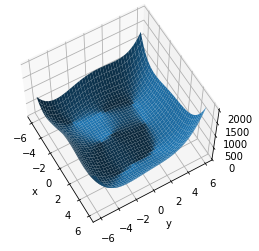

In [3]:
x = np.arange(-6, 6, 0.1) # 生成x轴数据列表
y = np.arange(-6, 6, 0.1) # 生成y轴数据列表
X, Y = np.meshgrid(x, y)  ## 对x,y数据进行网格化，将两个一维数组变成二维矩阵
Z = himmelblau([X, Y]) # 计算Z轴数据

fig = plt.figure('himmelblau') #创建himmelblau图
ax = fig.add_subplot(projection='3d') #新版本中用

# 绘制3D图形
ax.plot_surface(X, Y, Z) #绘制三维曲面图
ax.view_init(60, -30) ##改变绘制图像的视角,即相机的位置,沿着z轴旋转（-30），沿着y轴（60）
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [4]:
x = torch.tensor([0., 0.], requires_grad=True)
optimizer = torch.optim.Adam([x], lr=1e-3)
for step in range(20000):
    pred = himmelblau(x)
    optimizer.zero_grad() # 当网络参量进行反馈时,梯度是被积累的而不是被替换掉,这里即每次将梯度设置为0
    pred.backward() # 生成当前所在点函数值相关的梯度信息,这里即优化目标的梯度信息
    optimizer.step() # 使用梯度信息更新优化目标的值,即更新x[0]和x[1]
    if step % 2000 == 0: # 每2000次输出一下当前情况
        print ('step {}: x = {}, f(x) = {}'
               .format(step, x.tolist(), pred.item()))

step 0: x = [0.0009999999310821295, 0.0009999999310821295], f(x) = 170.0
step 2000: x = [2.3331806659698486, 1.9540694952011108], f(x) = 13.730916023254395
step 4000: x = [2.9820079803466797, 2.0270984172821045], f(x) = 0.014858869835734367
step 6000: x = [2.999983549118042, 2.0000221729278564], f(x) = 1.1074007488787174e-08
step 8000: x = [2.9999938011169434, 2.0000083446502686], f(x) = 1.5572823031106964e-09
step 10000: x = [2.999997854232788, 2.000002861022949], f(x) = 1.8189894035458565e-10
step 12000: x = [2.9999992847442627, 2.0000009536743164], f(x) = 1.6370904631912708e-11
step 14000: x = [2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step 16000: x = [3.0, 2.0], f(x) = 0.0
step 18000: x = [3.0, 2.0], f(x) = 0.0


### 处于0值的四个点分别是

- f(3.0,2.0)=0.0
- f(-2.805118,3.131312)=0.0
- f(-3.779310,-3.283186)=0.0
- f(3.584428,-1.848126)=0.0